# 인공신경망

In [1]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


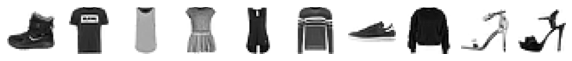

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [5]:
# 0=티셔츠, 1=바지, 2=스웨터, 3=드레스, 4=코트, 5=샌달, 6=셔츠, 7=스니커즈, 8=가방, 9=앵클부츠

print([train_target[i] for i in range(10)]) # 샘플 타깃값

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
import numpy as np

print(np.unique(train_target, return_counts=True)) # 0~9까지 6000개씩

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 아이템 분류
- 로지스틱 손실 함수를 최소화하는 확률적 경사 하강법 모델


In [7]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [8]:
print(train_scaled.shape) # 784 픽셀 샘플 60000개

(60000, 784)


In [9]:
from sklearn.model_selection import cross_validate # 교차검증
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


In [10]:
sc = SGDClassifier(loss='log', max_iter=9, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8303833333333334


In [11]:
sc = SGDClassifier(loss='log', max_iter=30, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8428166666666668


- SGDClassifier 모델로 패션 MNIST 데이터의 클래스를 가능한 잘 구분할 수 있도록 10개의 선형방정식에 대한 모델 파라미터를 찾음
- 티셔츠 ~ 앵클부츠 까지 10개의 클래스에 대한 선형 방정식을 모두 계산한 다음 소프트맥스 함수를 통과하여 각 클래스에 대한 확률을 얻을 수 있음

## 인공신경망
- 맨 오른쪽(z) 층 : 출력층
- 맨 왼쪽(x) 층 : 입력층
- z 값을 계산하는 단위 : 뉴런 = 유닛

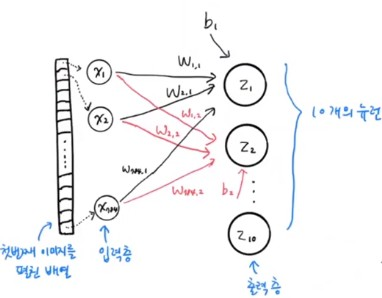

#### 텐서플로와 케라스
- 텐서플로 : 딥러닝 라이브러리, 
- 케라스 : 텐서플로의 고수준 API
- 딥러닝 라이브러리는 GPU를 사용하여 인공 신경망을 훈련

In [12]:
import tensorflow as tf

In [13]:
from tensorflow import keras

#### 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용.
- 딥러닝 분야의 데이터셋은 충분히 커서 검증 점수가 안정적이고 교차 검증을 사용하면 시간이 너무 오래 걸림



In [14]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [15]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [16]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


- 밀집층 Dense = 완전연결층 : 입력층과 출력층 사이...? 
- Sequential : 신경망 모델 생성



In [17]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,)) # Dense(뉴런 개수, 적용 함수, 입력 크기)

In [18]:
model = keras.Sequential(dense)

In [19]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') 
# sparse_categorical_crossentropy : 다중 분류, 정수로 된 타깃값을 사용해 크로스 엔트로피 손실을 계산
# categorial_crossentropy : 타깃값을 원핫인코딩으로 준비할 떄
# binary_crossentropy : 이진 분류

- 타깃에 해당하는 확률만 남겨 놓기 위해 나머지 확률에는 전부 0을 곱함
- --> 해당 클래스만 1이고 나머지는 모두 0인 배열 : 원 핫 인코딩

In [20]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [21]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 2ms/step - loss: 0.6089 - accuracy: 0.7946
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4782 - accuracy: 0.8407
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4558 - accuracy: 0.8493
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4447 - accuracy: 0.8529
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4364 - accuracy: 0.8551


In [22]:
model.evaluate(val_scaled, val_target) # 성능 확인

375/375 [==============================] - 1s 2ms/step - loss: 0.4772 - accuracy: 0.8384


[0.4771806597709656, 0.8384166955947876]

In [23]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [24]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

- 은닉층 : 입력층과 출력층 사이의 모든 층, 활성화 함수가 항상 존재
- 활성화 함수 : 신경망 층의 선형방정식의 계산 값에 적용하는 함수, 소프트맥스 함수도 활성화 함수의 종류
- 이진 분류의 경우 출력층의 활성화 함수는 시그모이드 함수, 다중 분류는 소프트맥스 함수로 제한되어 있지만 은닉층은 자유로움

In [25]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)) # <--은닉층 : 출력층보다 뉴런의 개수가 많게
dense2 = keras.layers.Dense(10, activation='softmax') # 출력층

## 심층 신경망
- 은닉층1, ... , 출력층을 리스트로 전달하여 여러 개의 층 추가

In [26]:
model = keras.Sequential([dense1, dense2])

#### summary()
- Output Shape (샘플의 개수, 출력 개수)
- - 샘플 개수 : 아직 정의 되어 있지 않으면 None(미니배치 경사 하강법)
- - 출력 개수 : 784개의 픽셀값이 은닉층을 통과하며 100개의 특성으로 압축됨
- Param # : 모델 파라미터 개수 | 78500 = (784*100 + 100(절편)), 1010 = (10*100 + 10) 

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### 층을 추가하는 다른 방법

In [30]:
#1
model = keras.Sequential([
                          keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
                          keras.layers.Dense(10, activation='softmax', name='oupput') 
                          ], name='패션 MNIST 모델')

In [31]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 oupput (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
#2
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5617 - accuracy: 0.8084
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4073 - accuracy: 0.8531
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3723 - accuracy: 0.8656
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3499 - accuracy: 0.8741
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3325 - accuracy: 0.8792


## 렐루 함수
- 시그모이드 함수는 양 끝이 갈수록 누워있기 때문에 올바른 출력을 만드는데 신속하게 대응하지 못함(특히 층이 많은 신경망일수록)
- 입력이 양수일 경우 활성화 함수가 없는 것처럼 그냥 입력 통과, 음수일 경우는 0
- max(0,z)

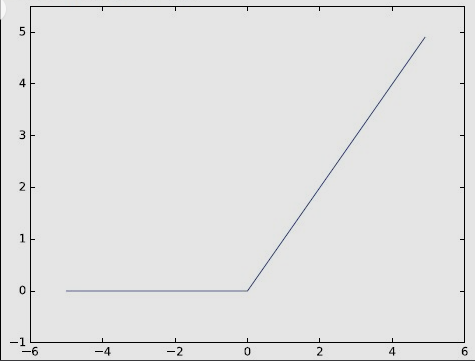

Flatten() : 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할, 입력에 곱해지는 가중치나 절편이 없음 --> 학습 X

In [38]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [40]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [42]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5355 - accuracy: 0.8106
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3912 - accuracy: 0.8573
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3537 - accuracy: 0.8734
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3307 - accuracy: 0.8811
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3171 - accuracy: 0.8871


In [43]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8752


[0.3647884428501129, 0.875249981880188]

#### 옵티마이저
: 케라스에서 제공하는 다양한 종류의 경사 하강법 알고리즘
- SGD
- - learning_rate 학습률, 기본값 0.01
- - momentum 모멘텀 최적화, 기본값 0, 0.9 이상 지정 (nesterov=True : 네스테로프 모멘텀 최적화 : 모멘텀 최적화를 2번 반복 구현)
- - optimizer 적응적 학습률, 기본값 rmsprop

In [44]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [45]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [47]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [49]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [50]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [51]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [54]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [55]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5296 - accuracy: 0.8165
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3967 - accuracy: 0.8582
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3538 - accuracy: 0.8722
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3313 - accuracy: 0.8798
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3102 - accuracy: 0.8852


In [56]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3484 - accuracy: 0.8760


[0.3483728766441345, 0.8759999871253967]

# 신경망 모델 훈련
## 손실 곡선


In [57]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [58]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [59]:
model = model_fn()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) # verbose=0 : 훈련 과정 출력 조절, 기본값은 1

In [61]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


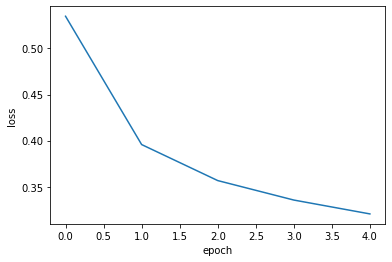

In [62]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

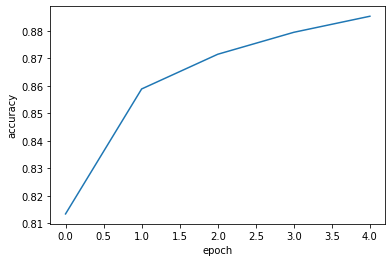

In [64]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5308 - accuracy: 0.8106
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3929 - accuracy: 0.8596
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3548 - accuracy: 0.8727
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3347 - accuracy: 0.8794
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3172 - accuracy: 0.8867
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3069 - accuracy: 0.8913
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3003 - accuracy: 0.8936
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2882 - accuracy: 0.8968
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2827 - accuracy: 0.9013
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.279

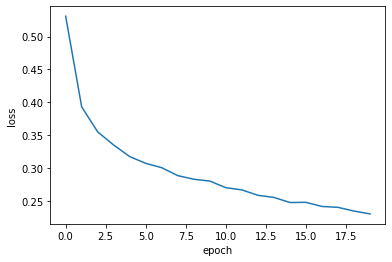

In [66]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

In [67]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5293 - accuracy: 0.8138 - val_loss: 0.4143 - val_accuracy: 0.8497
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3930 - accuracy: 0.8589 - val_loss: 0.4052 - val_accuracy: 0.8550
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3580 - accuracy: 0.8714 - val_loss: 0.3761 - val_accuracy: 0.8645
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3342 - accuracy: 0.8808 - val_loss: 0.3647 - val_accuracy: 0.8752
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3204 - accuracy: 0.8870 - val_loss: 0.3681 - val_accuracy: 0.8727
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3108 - accuracy: 0.8891 - val_loss: 0.3623 - val_accuracy: 0.8747
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2970 - accuracy: 0.8953 - val_loss: 0.3734 - val_accuracy:

In [68]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


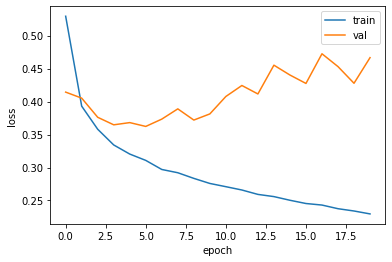

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

5 이후로 손실이 다시 상승 --> 과대적합

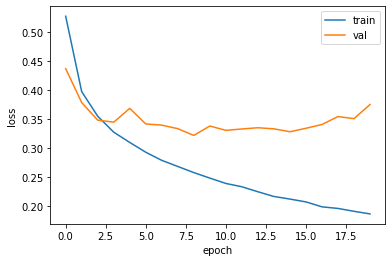

In [71]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 드롭아웃
: 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막음
- 특정 뉴런에 과대하게 의존하는 것을 줄임

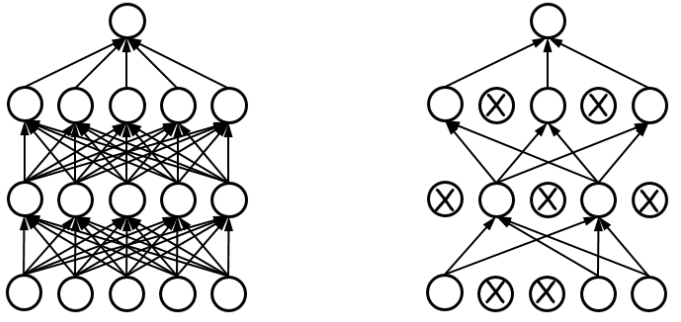

In [72]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


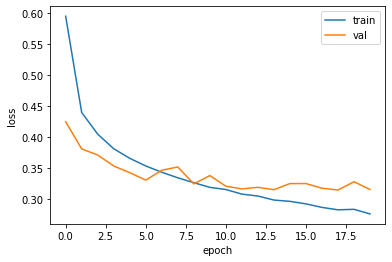

In [75]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 모델 저장과 복원
- save_weights() : 훈련된 모델의 파라미터를 저장, 기본은 텐서플로의 체크포인트 포맷으로 저장, h5일 경우 HDF5 포맷으로 저장
- save() : 모델 구조&모델 파라미터 함께 저장, 기본은 텐서플로의 SavedModel 포맷으로 저장, h5일 경우 HDF5 포맷으로 저장


In [77]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [79]:
model.save_weights('model-weights.h5') # save_weights() : 훈련된 모델의 파라미터 저장

In [80]:
model.save('model-whole.h5')

In [81]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 May 22 10:22 model-weights.h5
-rw-r--r-- 1 root root 982664 May 22 10:22 model-whole.h5


훈련을 하지 않은 새로운 모델

In [84]:
model = model_fn(keras.layers.Dropout(0.3)) # load_weights() : 훈련하지 않은 새로운 모델 생성 후 이전 모델 파라미터 적재
model.load_weights('model-weights.h5')

In [85]:
val_labels = np.argmax(model.predict(val_scaled), axis=-1) # 샘플마다 10개의 클래스에 대한 확률 반환(다중 분류)
 # 배열에서 가장 큰 값의 인덱스 반환, 
print(np.mean(val_labels == val_target))

0.882


In [86]:
model = keras.models.load_model('model-whole.h5') # load_model() : 모델이 저장된 파일을 읽어옴
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3244 - accuracy: 0.8820


[0.32444557547569275, 0.8820000290870667]

### 콜백
- 모델을 두번씩 훈련하지 않고 한 번에 끝낼 때
- keras.callbacks
- ModelCheckpoint : 에포크마다 모델 저장, save_best_only=True : 가장 낮은 검증 점수를 만드는 모델 저장
- EarlyStopping : 과대적합이 커지기 전에 미리 종료(=조기종료)
- - patience= : 검증 점수가 향상되지 않더라도 참을 에포크 횟수
- - restore_best_weights=True : 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
---
* ModelCheckpoint와 EarlyStopping을 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지, 중지 후 현재 모델의 파라미터를 최상의 파라미터로 되돌림

In [87]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [88]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3204 - accuracy: 0.8844


[0.32041895389556885, 0.8844166398048401]

In [92]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [93]:
print(early_stopping_cb.stopped_epoch) # 훈련이 중지된 에포크, 최상의 모델은 -1

13


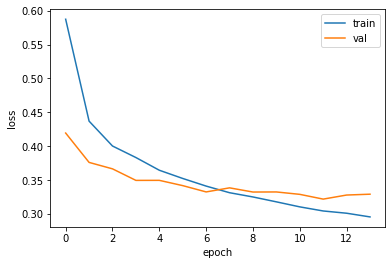

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [95]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3219 - accuracy: 0.8842


[0.321882963180542, 0.8842499852180481]